In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funciones
20. Utilizando solo las operaciones y funciones vistas en los ejercicios anteriores, escribir codigos de una sola linea para las siguientes funciones matematicas:
    - $||v||_2$
    - $||v - w||_2$
    - $<v,w>$

In [ ]:
def norma2(v: np.ndarray) -> float:
    return np.sqrt(sum(v[i]**2 for i in range(len(v))))

def distancia2(v: np.ndarray, w: np.ndarray) -> float:
    return norma2(v - w)

def producto_interno(v: np.ndarray, w: np.ndarray) -> float:
    return sum(v[i] + w[i] for i in range(len(v)))

25.  Ley de los grandes numeros. Esta ley asegura que si tiramos $n$ veces una moneda, la proporcion de veces que sale cara es 1/2 cuando $n$ tiene a infinito. Simular 10 lanzamientos de una moneda y calcular la proporcion de veces que sale cara. Repetir para n = 1000, 100000. 

In [ ]:
def simulacion_lgn_cara(n: int) -> float:
    x = np.array(["cara", "ceca"])
    s = np.random.choice(x, size=n)
    k = 0
    for i in range(len(s)):
        if s[i] == "cara":
            k = k + 1 
    return k / n

print(simulacion_lgn_cara(10))
print(simulacion_lgn_cara(1000))
print(simulacion_lgn_cara(100000))
print(simulacion_lgn_cara(10000000))

0.5
0.489
0.49979
0.4999055


26. Se tira $n$ veces una moneda. Intentar predecir, si existen, los siguientes limites cuando $n$ tiende a infinito
    - La cantidad de caras dividido por la cantidad de cecas
    - La cantidad de caras menos la cantidad de cecas
    - La cantidad de caras menos la cantidad de cecas dividido por la cantidad total de tiradas
    - (dificil) Considerando las veces que salieron tres caras seguidas, la proporcion de veces que en la siguiente tirada sale nuevamente cara.

In [24]:
def caras(s: np.ndarray) -> int:
    k: int = 0 
    for i in range(len(s)):
        if s[i] == "cara": 
            k = k + 1
    return k

def cecas(s: np.ndarray) -> int:
    k: int = 0 
    for i in range(len(s)):
        if s[i] == "ceca": 
            k = k + 1
    return k

def cara_tras_tres_caras(s: np.ndarray) -> float:
    k = 0
    for i in range(len(s)):
        if s[i] == "caras":
            cara_tras_tres_caras(s[i+1:i+3])
            k = k + 1
    return k/len(s)


In [25]:
n = 1000000
x = np.array(["cara", "ceca"])
s = np.random.choice(x, size=n)

print(f'La cantidad de caras dividido por la cantidad de cecas: {round(caras(s)/cecas(s), 3)}')
print(f'La cantidad de caras menos la cantidad de cecas:{caras(s) - cecas(s)}')
print(f'La cantidad de caras menos la cantidad de cecas dividido por la cantidad total de tirada: {(caras(s) - cecas(s))/n}')
print(f'La proporcion de veces que en la siguiente tirada sale nuevamente cara tras tres caras seguidas,: {cara_tras_tres_caras(s)}')

La cantidad de caras dividido por la cantidad de cecas: 0.998
La cantidad de caras menos la cantidad de cecas:-1010
La cantidad de caras menos la cantidad de cecas dividido por la cantidad total de tirada: -0.00101
La proporcion de veces que en la siguiente tirada sale nuevamente cara tras tres caras seguidas,: 0.0


# Archivos de datos
27. La biblioteca `Pandas` nos permite trabajar facilmente con archivos de datos.
    - Leer el archivo `casos_coronavirus.csv`
    - Graficar la curva de casos por dia
    - Graficar la curva de casos acumulados
    - Difinir log_cum_casos como el logaritmo de la cantidad de casos acumulados y graficar en funcion de la cantidad de dias trasncurridos.
    - Estimar, tomando dos valores, la pendiente de la recta para los datos a partir del dia 30.
    - Graficar la recta estimada junto con los datos. Es una buena estimacion?

In [34]:
df = pd.read_csv('casos_coronavirus.csv')
df.head()

,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               96 non-null     object
 1   confirmados_Nuevos  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [36]:
datos_np = df.to_numpy()
print(datos_np)

[['3-3-2020' 1]
 ['4-3-2020' 0]
 ['5-3-2020' 1]
 ['6-3-2020' 6]
 ['7-3-2020' 0]
 ['8-3-2020' 3]
 ['9-3-2020' 5]
 ['10-3-2020' 2]
 ['11-3-2020' 2]
 ['12-3-2020' 10]
 ['13-3-2020' 3]
 ['14-3-2020' 11]
 ['15-3-2020' 11]
 ['16-3-2020' 9]
 ['17-3-2020' 14]
 ['18-3-2020' 19]
 ['19-3-2020' 31]
 ['20-3-2020' 30]
 ['21-3-2020' 67]
 ['22-3-2020' 41]
 ['23-3-2020' 36]
 ['24-3-2020' 86]
 ['25-3-2020' 117]
 ['26-3-2020' 87]
 ['27-3-2020' 101]
 ['28-3-2020' 55]
 ['29-3-2020' 75]
 ['30-3-2020' 146]
 ['31-3-2020' 88]
 ['1-4-2020' 79]
 ['2-4-2020' 132]
 ['3-4-2020' 88]
 ['4-4-2020' 98]
 ['5-4-2020' 103]
 ['6-4-2020' 74]
 ['7-4-2020' 87]
 ['8-4-2020' 80]
 ['9-4-2020' 99]
 ['10-4-2020' 81]
 ['11-4-2020' 167]
 ['12-4-2020' 66]
 ['13-4-2020' 69]
 ['14-4-2020' 166]
 ['15-4-2020' 128]
 ['16-4-2020' 98]
 ['17-4-2020' 88]
 ['18-4-2020' 81]
 ['19-4-2020' 102]
 ['20-4-2020' 90]
 ['21-4-2020' 112]
 ['22-4-2020' 144]
 ['23-4-2020' 147]
 ['24-4-2020' 172]
 ['25-4-2020' 173]
 ['26-4-2020' 112]
 ['27-4-2020' 111]
 ['

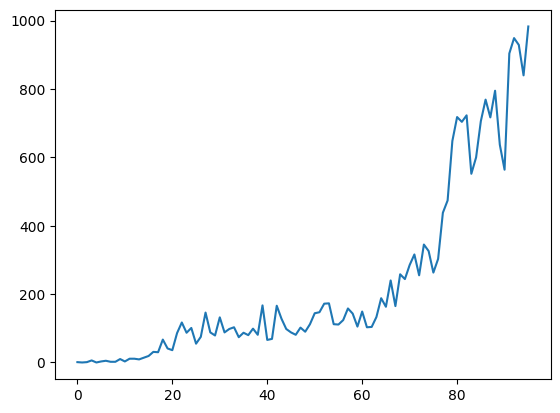

In [37]:
casos_diarios = datos_np[:, 1]
plt.plot(casos_diarios)

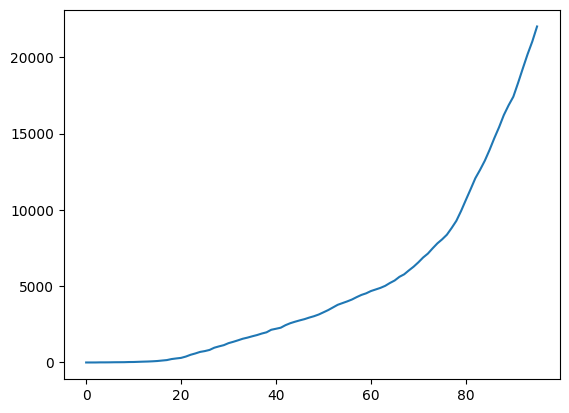

In [39]:
cum_casos = casos_diarios.cumsum()
plt.plot(cum_casos)
plt.show()

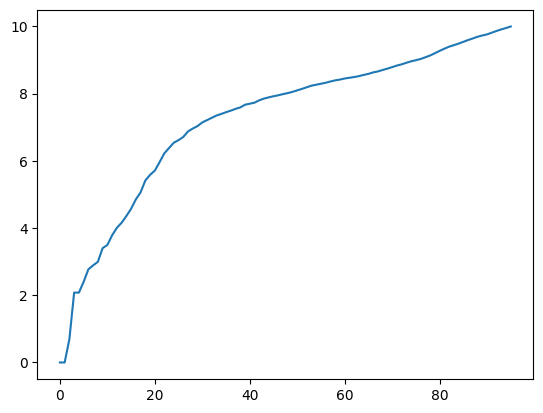

In [40]:
plt.plot(np.log(np.float64(cum_casos)))

([<matplotlib.lines.Line2D at 0x12386296e90>], None)

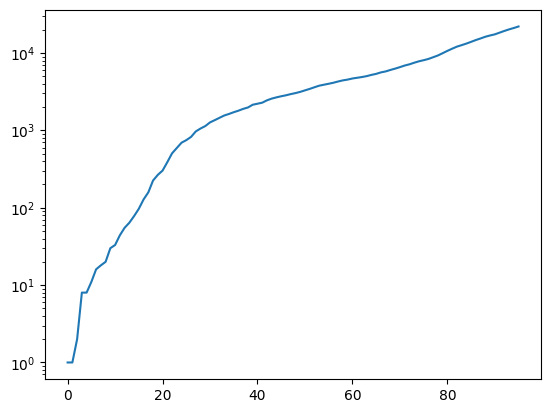

In [41]:
plt.plot(cum_casos), plt.yscale("log")